In [1]:
image_path = 'img1.png'

**Filtro de Média (ou Suavização)**: Este filtro aplica uma média aritmética simples sobre os pixels dentro da área do kernel. Ele é usado para suavizar a imagem e reduzir o ruído, resultando em uma imagem menos detalhada e mais "borrada". É útil para preparar imagens para processamento posterior, minimizando interferências pequenas e aleatórias.

$$M = \frac{1}{m^2} \begin{bmatrix}
1 & 1 & \cdots & 1 \\
1 & 1 & \cdots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 1 & \cdots & 1
\end{bmatrix}$$


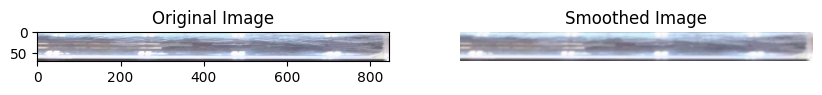

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
# image_path = 'img1.png' # Certifique-se de que o caminho até sua imagem está correto
img = cv2.imread(image_path)

# Converter BGR para RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Definir o tamanho do kernel para o filtro de média
kernel_size = (5, 5) # Você pode ajustar isso conforme necessário

# Aplicar o filtro de média
img_smoothed = cv2.blur(img, kernel_size)

# Converter imagem suavizada de BGR para RGB
img_smoothed_rgb = cv2.cvtColor(img_smoothed, cv2.COLOR_BGR2RGB)

# Salvar a imagem suavizada
# cv2.imwrite('img1_smoothed.jpg', img_smoothed)

# Configurar a exibição das imagens com matplotlib
plt.figure(figsize=(10, 5))

# Exibir a imagem original
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

# Exibir a imagem suavizada
plt.subplot(1, 2, 2)
plt.imshow(img_smoothed_rgb)
plt.title('Smoothed Image')

# Remover os eixos das imagens
plt.axis('off')

# Mostrar as imagens
plt.show()


**Filtro Gaussiano**: Semelhante ao filtro de média, mas utiliza uma matriz que segue uma distribuição gaussiana (forma de sino) para ponderar os pixels. Isso resulta em uma suavização mais natural, sendo especialmente eficaz na remoção de ruído gaussiano da imagem.

$$G(x, y) = \frac{1}{2 \pi \sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

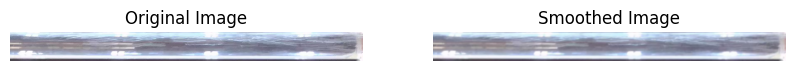

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
# image_path = 'img1.jpg'  # Certifique-se de que o caminho até sua imagem está correto
img = cv2.imread(image_path)

# Converter BGR para RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Definir o tamanho do kernel para o filtro gaussiano
# O tamanho do kernel deve ser positivo e ímpar
kernel_size = (5, 5)  # Você pode ajustar isso conforme necessário

# Definir o desvio padrão para o eixo X e Y (sigmaX e sigmaY)
# Se sigmaY é zero, então sigmaX é usado para ambos os eixos
# Se ambos são zeros, eles são calculados a partir do tamanho do kernel
sigmaX = 0

# Aplicar o filtro gaussiano
img_smoothed = cv2.GaussianBlur(img, kernel_size, sigmaX)

# Converter imagem suavizada de BGR para RGB
img_smoothed_rgb = cv2.cvtColor(img_smoothed, cv2.COLOR_BGR2RGB)

# Configurar a exibição das imagens com matplotlib
plt.figure(figsize=(10, 5))

# Exibir a imagem original
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')  # Remover os eixos da imagem original

# Exibir a imagem suavizada
plt.subplot(1, 2, 2)
plt.imshow(img_smoothed_rgb)
plt.title('Smoothed Image')
plt.axis('off')  # Remover os eixos da imagem suavizada

# Mostrar as imagens
plt.show()


**Filtro de Sobel**: Utilizado para detectar bordas na imagem. O filtro de Sobel usa dois kernels separados que são aplicados à imagem para medir as derivadas horizontais e verticais. A magnitude das derivadas é então usada para destacar as bordas. É uma ferramenta fundamental para tarefas que necessitam identificar contornos e bordas dos objetos na imagem.

$$G_x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}, \quad G_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}$$

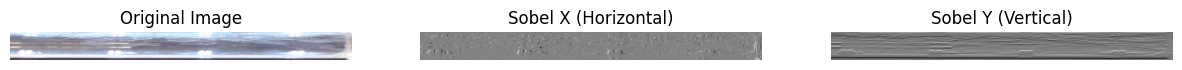

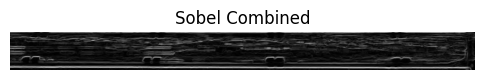

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
# image_path = 'img1.jpg'  # Certifique-se de que o caminho até sua imagem está correto
img = cv2.imread(image_path)

# Converter para escala de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar o filtro de Sobel
# O ddepth é a profundidade da imagem de saída. Quando ddepth=-1, a imagem de saída terá a mesma profundidade que a imagem de entrada.
# dx = 1 e dy = 0 calcula o gradiente em direção x (horizontal)
# dx = 0 e dy = 1 calcula o gradiente em direção y (vertical)
sobelx = cv2.Sobel(img_gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)  # Gradiente horizontal
sobely = cv2.Sobel(img_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)  # Gradiente vertical

# Combinar os gradientes horizontal e vertical
sobel_combined = cv2.magnitude(sobelx, sobely)

# Configurar a exibição das imagens com matplotlib
plt.figure(figsize=(15, 5))

# Exibir a imagem original
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB para exibição
plt.title('Original Image')
plt.axis('off')

# Exibir o gradiente horizontal
plt.subplot(1, 3, 2)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X (Horizontal)')
plt.axis('off')

# Exibir o gradiente vertical
plt.subplot(1, 3, 3)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y (Vertical)')
plt.axis('off')

# Exibir a imagem combinada (opcionalmente, em outra figura para evitar confusão)
plt.figure(figsize=(6, 5))
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')

plt.show()


**Filtro de Laplaciano**: Foca na detecção de bordas, assim como o filtro de Sobel, mas de uma maneira diferente. Ele calcula a segunda derivada da imagem, destacando regiões onde há rápida mudança de intensidade e, consequentemente, realçando bordas.

$$L = \begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}$$

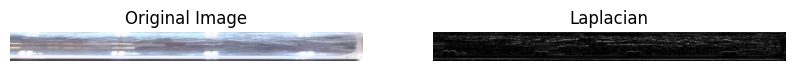

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
# image_path = 'img1.jpg'  # Certifique-se de que o caminho até sua imagem está correto
img = cv2.imread(image_path)

# Converter para escala de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar o filtro Laplaciano
# O ddepth é a profundidade da imagem de saída. Um valor comum é cv2.CV_64F.
laplacian = cv2.Laplacian(img_gray, ddepth=cv2.CV_64F)

# Converter o resultado para um tipo de dados positivo para exibição
laplacian_abs = np.absolute(laplacian)
laplacian_display = np.uint8(laplacian_abs)

# Configurar a exibição das imagens com matplotlib
plt.figure(figsize=(10, 5))

# Exibir a imagem original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB para exibição
plt.title('Original Image')
plt.axis('off')

# Exibir a imagem processada pelo Laplaciano
plt.subplot(1, 2, 2)
plt.imshow(laplacian_display, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.show()


**Filtro de Prewitt**: Similar ao filtro de Sobel, é usado para detecção de bordas. Ele também usa dois kernels para medir as mudanças horizontais e verticais, mas com uma matriz de coeficientes diferente, resultando em uma sensibilidade ligeiramente distinta para as bordas.

$$P_x = \begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}, \quad P_y = \begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}$$

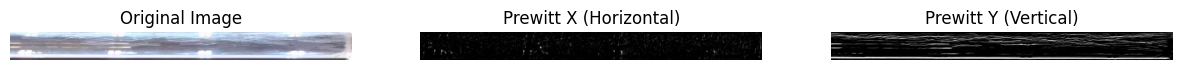

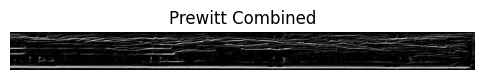

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
# image_path = 'img1.jpg'  # Ajuste para o caminho da sua imagem
img = cv2.imread(image_path)

# Converter para escala de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Kernels de Prewitt
kernel_prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernel_prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Aplicar o filtro de Prewitt
img_prewitt_x = cv2.filter2D(img_gray, -1, kernel_prewitt_x)
img_prewitt_y = cv2.filter2D(img_gray, -1, kernel_prewitt_y)

# Combinar os gradientes horizontal e vertical
img_prewitt = cv2.addWeighted(img_prewitt_x, 0.5, img_prewitt_y, 0.5, 0)

# Configurar a exibição das imagens com matplotlib
plt.figure(figsize=(15, 5))

# Exibir a imagem original
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Exibir o gradiente horizontal
plt.subplot(1, 3, 2)
plt.imshow(img_prewitt_x, cmap='gray')
plt.title('Prewitt X (Horizontal)')
plt.axis('off')

# Exibir o gradiente vertical
plt.subplot(1, 3, 3)
plt.imshow(img_prewitt_y, cmap='gray')
plt.title('Prewitt Y (Vertical)')
plt.axis('off')

# Opcional: exibir a imagem combinada em uma nova figura para evitar confusão
plt.figure(figsize=(6, 5))
plt.imshow(img_prewitt, cmap='gray')
plt.title('Prewitt Combined')
plt.axis('off')

plt.show()


**Filtro de Realce de Contraste (Contrast Stretching)**: Destinado a melhorar o contraste de uma imagem ajustando o intervalo de intensidade dos seus pixels. Isso é particularmente útil em imagens com contrastes pobres, ajudando a destacar detalhes que anteriormente poderiam não ser tão visíveis.

$$s = \begin{cases} 
  0 & \text{se } r < a \\
  \frac{255 (r - a)}{b - a} & \text{se } a \leq r \leq b \\
  255 & \text{se } r > b
\end{cases}$$


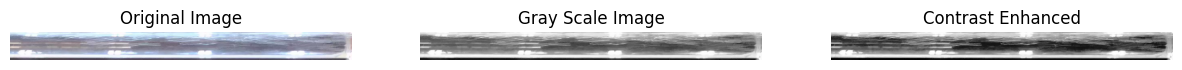

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
# image_path = 'img1.jpg'  # Ajuste para o caminho da sua imagem
img = cv2.imread(image_path)

# Converter para escala de cinza para equalização
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar a equalização de histograma na imagem em escala de cinza
img_eq = cv2.equalizeHist(img_gray)

# Configurar a exibição das imagens com matplotlib
plt.figure(figsize=(15, 7))

# Exibir a imagem original colorida
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB para exibição
plt.title('Original Image')
plt.axis('off')

# Exibir a imagem original em escala de cinza
plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray Scale Image')
plt.axis('off')

# Exibir a imagem com realce de contraste
plt.subplot(1, 3, 3)
plt.imshow(img_eq, cmap='gray')
plt.title('Contrast Enhanced')
plt.axis('off')

plt.show()


**Filtro de Canny**: Não é um filtro convolucional simples, mas uma sequência de passos que incluem o uso de um filtro gaussiano para suavização, seguido da aplicação de filtros de Sobel para encontrar a intensidade do gradiente, e um processo de supressão não-máxima e limiarização por histerese para detecção precisa de bordas. É amplamente considerado um dos detectores de bordas mais eficazes. O filtro de Canny é um algoritmo de múltiplas etapas para detecção de bordas, não sendo descrito diretamente por uma única expressão matemática, mas envolve várias etapas, incluindo:

1. Suavização com um filtro Gaussiano para reduzir o ruído.
2. Encontrar gradientes de intensidade da imagem.
3. Aplicar supressão de não máximos para afinar as bordas candidatas.
4. Aplicar limiarização por histerese para decidir quais bordas são realmente bordas.

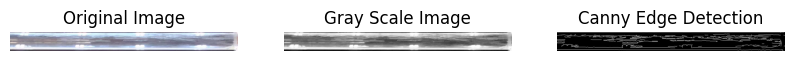

In [8]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
# image_path = 'img1.jpg'  # Ajuste para o caminho da sua imagem
img = cv2.imread(image_path)

# Converter para escala de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar o filtro de Canny
edges = cv2.Canny(img_gray, 100, 200)  # Ajuste os limiares conforme necessário

# Configurar a exibição das imagens com matplotlib
plt.figure(figsize=(10, 5))

# Exibir a imagem original colorida
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB para exibição
plt.title('Original Image')
plt.axis('off')

# Exibir a imagem original em escala de cinza
plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray Scale Image')
plt.axis('off')

# Exibir a imagem após a detecção de bordas de Canny
plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

**Filtros Morfológicos**: Incluem operações como erosão, dilatação, abertura e fechamento, que são usados principalmente para processamento de imagens binárias. Eles são úteis para remover ruído, separar elementos que estão unidos, encontrar buracos em objetos e mais. Estes filtros são operações baseadas em forma que processam imagens de acordo com suas estruturas. As duas operações básicas são a erosão e a dilatação, expressas como:

- Erosão: $(A \ominus B)(x, y) = \min_{(b_x, b_y) \in B} [A(x - b_x, y - b_y)]$

- Dilatação: $(A \oplus B)(x, y) = \max_{(b_x, b_y) \in B} [A(x + b_x, y + b_y)]$

Onde que $A$ é a imagem de entrada, $B$ o elemento estruturante, e $(x,y)$ são as coordenadas dos pixels na imagem. 

Estas operações são a base para outras mais complexas como abertura e fechamento:

- Abertura: $A \circ B = (A \ominus B) \oplus B$

- Fechamento: $A \bullet B = (A \oplus B) \ominus B$






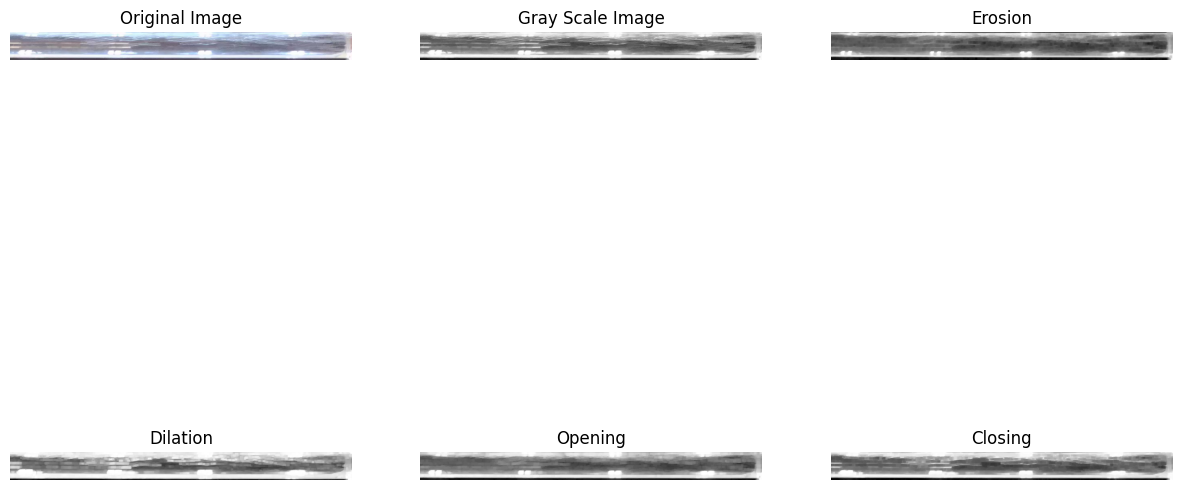

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
# image_path = 'img1.jpg'  # Ajuste para o caminho da sua imagem
img = cv2.imread(image_path)

# Converter para escala de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Definir o kernel para as operações morfológicas
kernel = np.ones((5, 5), np.uint8)

# Aplicar erosão
erosion = cv2.erode(img_gray, kernel, iterations=1)

# Aplicar dilatação
dilation = cv2.dilate(img_gray, kernel, iterations=1)

# Aplicar abertura (erosão seguida de dilatação)
opening = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)

# Aplicar fechamento (dilatação seguida de erosão)
closing = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)

# Configurar a exibição das imagens com matplotlib
plt.figure(figsize=(15, 10))

# Exibir a imagem original colorida
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB para exibição
plt.title('Original Image')
plt.axis('off')

# Exibir a imagem original em escala de cinza
plt.subplot(2, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray Scale Image')
plt.axis('off')

# Exibir a imagem após erosão
plt.subplot(2, 3, 3)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')
plt.axis('off')

# Exibir a imagem após dilatação
plt.subplot(2, 3, 4)
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')
plt.axis('off')

# Exibir a imagem após abertura
plt.subplot(2, 3, 5)
plt.imshow(opening, cmap='gray')
plt.title('Opening')
plt.axis('off')

# Exibir a imagem após fechamento
plt.subplot(2, 3, 6)
plt.imshow(closing, cmap='gray')
plt.title('Closing')
plt.axis('off')

plt.show()


**Filtro de Mediana**: Um filtro não-linear que substitui cada valor de pixel pela mediana dos valores de intensidade na vizinhança do pixel. Isso é particularmente eficaz na remoção de ruído do tipo sal e pimenta, sem desfocar as bordas tanto quanto um filtro de média. O filtro de mediana não é representado por um kernel fixo; ele substitui cada valor de pixel pela mediana dos valores de intensidade na vizinhança do pixel.

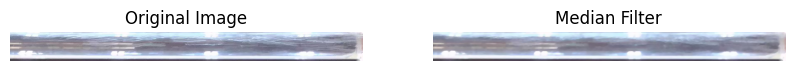

In [10]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
# image_path = 'img1.jpg'  # Ajuste para o caminho da sua imagem
img = cv2.imread(image_path)

median_filtered = cv2.medianBlur(img, 5)

# Configurar a exibição das imagens com matplotlib
plt.figure(figsize=(10, 5))

# Exibir a imagem original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB para exibição
plt.title('Original Image')
plt.axis('off')

# Exibir a imagem após o filtro de mediana
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB para exibição
plt.title('Median Filter')
plt.axis('off')

plt.show()

**Filtro de Sharpening (Aguçamento)**: Destinado a realçar os detalhes de uma imagem, aumentando a nitidez das bordas. Isso é feito destacando as diferenças de intensidade entre um pixel e seus vizinhos.

$$S = \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{bmatrix}$$

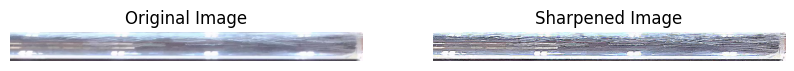

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
# image_path = 'img1.jpg'  # Ajuste para o caminho da sua imagem
img = cv2.imread(image_path)

sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

# Aplicar o filtro de aguçamento usando filter2D
sharpened_img = cv2.filter2D(img, -1, sharpening_kernel)

# Configurar a exibição das imagens com matplotlib
plt.figure(figsize=(10, 5))

# Exibir a imagem original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB para exibição
plt.title('Original Image')
plt.axis('off')

# Exibir a imagem após o aguçamento
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB para exibição
plt.title('Sharpened Image')
plt.axis('off')

plt.show()


**Filtro Bilateral**: Um filtro avançado que suaviza a imagem enquanto preserva as bordas. Ele faz isso considerando tanto a diferença de intensidade quanto a distância espacial dos pixels, o que permite reduzir o ruído sem perder a nitidez das bordas. O filtro bilateral considera tanto a diferença de intensidade quanto a distância espacial dos pixels, não sendo representado por um kernel fixo em forma de matriz.

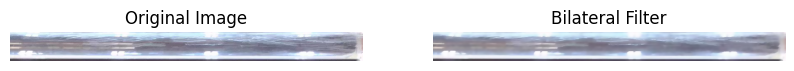

In [12]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
# image_path = 'img1.jpg'  # Ajuste para o caminho da sua imagem
img = cv2.imread(image_path)

filtered_img = cv2.bilateralFilter(img, 9, 75, 75)

# Configurar a exibição das imagens com matplotlib
plt.figure(figsize=(10, 5))

# Exibir a imagem original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB para exibição
plt.title('Original Image')
plt.axis('off')

# Exibir a imagem após o filtro bilateral
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB para exibição
plt.title('Bilateral Filter')
plt.axis('off')

plt.show()


**Filtro de Gabor**: Usado para análise de texturas, o filtro de Gabor pode identificar direções específicas na textura da imagem. É bastante utilizado em aplicações de visão computacional, como reconhecimento de padrões e análise de texturas.

$$G(x, y; \lambda, \theta, \psi, \sigma, \gamma) = \exp\left(-\frac{x'^2 + \gamma^2 y'^2}{2\sigma^2}\right) \cos\left(2\pi\frac{x'}{\lambda} + \psi\right)$$

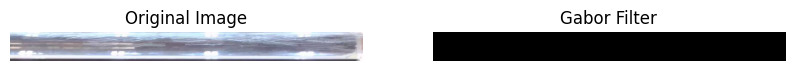

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
# image_path = 'img1.jpg'  # Ajuste para o caminho da sua imagem
img = cv2.imread(image_path)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
# Parâmetros para o kernel do filtro de Gabor
ksize = (31, 31)  # Tamanho do kernel. Quanto maior, mais suave será o efeito do filtro.
sigma = 4.0  # Desvio padrão do envelope gaussiano.
theta = np.pi / 4  # Orientação do filtro normal.
lambd = 10.0  # Comprimento de onda da função coseno.
gamma = 0.5  # Aspect ratio (elipticidade) do envelope gaussiano.
psi = 0  # Fase offset.
ktype = cv2.CV_32F  # Tipo do kernel.
    
# Criar o kernel do filtro de Gabor
gabor_kernel = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi, ktype)
    
# Aplicar o filtro de Gabor
filtered_img = cv2.filter2D(img_gray, -1, gabor_kernel)
    
# Configurar a exibição das imagens com matplotlib
plt.figure(figsize=(10, 5))

# Exibir a imagem original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB para exibição
plt.title('Original Image')
plt.axis('off')

# Exibir a imagem após o filtro de Gabor
plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Gabor Filter')
plt.axis('off')

plt.show()
